In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Exercise 1
a) Load house sales data from file kc_house_data.csv, print first records.  
b) Print the variable list. Select categorical and numerical variables.  
c) Compute basic statistics of numerical variables. Are all of them meaningful?

In [ ]:
pd.read_csv("kc_house_data.csv").head()
# Based on the first five records, we find out what the data looks like and what categories it is divided into

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
house = pd.read_csv("kc_house_data.csv")
print(house.columns)
house_categorical_df = house[['id','date','waterfront','view','condition','grade','zipcode']]
house_numerical_df = house[['bathrooms','bedrooms','floors','lat','long','price','sqft_above','sqft_basement','sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15', 'yr_built','yr_renovated']]
#Program prints the categories, data is divided into two groups

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:
house_numerical_df.describe()
#Numerical categories are describred with: count of records, mean, standard deviationand by percent.

,bathrooms,bedrooms,floors,lat,long,price,sqft_above,sqft_basement,sqft_living,sqft_living15,sqft_lot,sqft_lot15,yr_built,yr_renovated
count,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,2.114757,3.370842,1.494309,47.560053,-122.213896,5.400881e+05,1788.390691,291.509045,2079.899736,1986.552492,1.510697e+04,12768.455652,1971.005136,84.402258
std,0.770163,0.930062,0.539989,0.138564,0.140828,3.671272e+05,828.090978,442.575043,918.440897,685.391304,4.142051e+04,27304.179631,29.373411,401.679240
min,0.000000,0.000000,1.000000,47.155900,-122.519000,7.500000e+04,290.000000,0.000000,290.000000,399.000000,5.200000e+02,651.000000,1900.000000,0.000000
25%,1.750000,3.000000,1.000000,47.471000,-122.328000,3.219500e+05,1190.000000,0.000000,1427.000000,1490.000000,5.040000e+03,5100.000000,1951.000000,0.000000
50%,2.250000,3.000000,1.500000,47.571800,-122.230000,4.500000e+05,1560.000000,0.000000,1910.000000,1840.000000,7.618000e+03,7620.000000,1975.000000,0.000000
75%,2.500000,4.000000,2.000000,47.678000,-122.125000,6.450000e+05,2210.000000,560.000000,2550.000000,2360.000000,1.068800e+04,10083.000000,1997.000000,0.000000
max,8.000000,33.000000,3.500000,47.777600,-121.315000,7.700000e+06,9410.000000,4820.000000,13540.000000,6210.000000,1.651359e+06,871200.000000,2015.000000,2015.000000


## Exercise 2
Using scatter plot:  
a) Show the relation of square footage and price.  
b) Check how price is influenced by apartment's grade. Find other variables correlated with price.  
c) Check how good apartments are distributed over the city. First, plot zipcode versus price. Then, use apartments coordinates (longitude and lattitude) in order to show where apartments of good grade are located. 

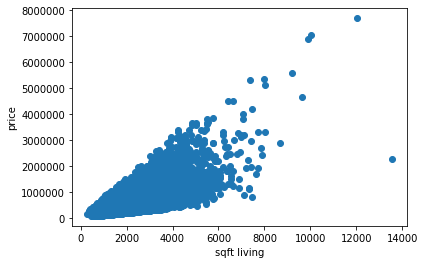

In [ ]:
plt.scatter(house[['sqft_living']],house[['price']])
plt.xlabel('sqft living')
plt.ylabel('price')
plt.ticklabel_format(axis='y', style="plain")
plt.show()
# In this data most of houses are small
# We could see one house which is quite cheap and has high sqft living

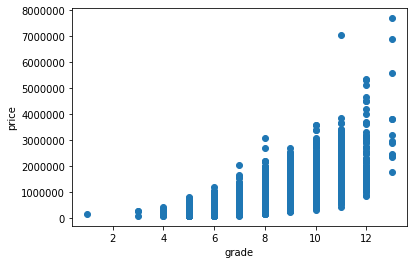

In [ ]:
plt.scatter(house[['grade']],house[['price']])
plt.ticklabel_format(axis='y', style="plain")
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
# relation between price and grade is visible 
# houses with better grade have higher price

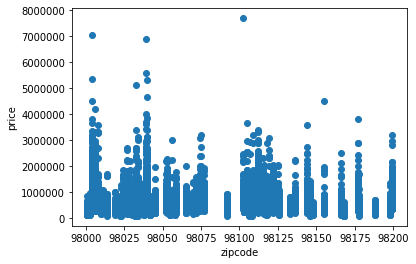

In [ ]:
plt.scatter(house[['zipcode']],house[['price']])
plt.ticklabel_format(axis='y', style="plain")
plt.xlabel('zipcode')
plt.ylabel('price')
plt.show()
# On this graph we can see that there are better and worse district in this city

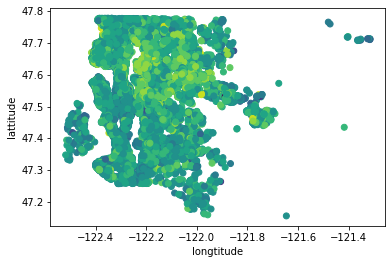

In [ ]:
plt.scatter(house[['long']],house[['lat']],None,house[['grade']].values)
plt.xlabel('longtitude')
plt.ylabel('lattitude')
plt.rcParams["figure.figsize"] = (20,20)
plt.show()
# We can see where houses with better grade are
# The best houses are in one point, but the worst are in random places

## Exercise 3
a) Create boxplot of apartment's grade versus it's price. Compare with plot 2b).  
b) Create mosaic plot of any two categorical variables.

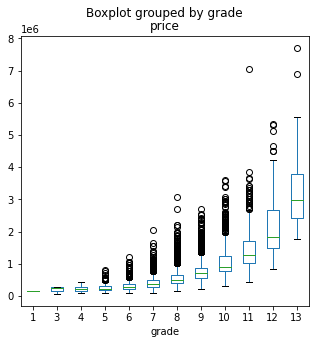

In [ ]:
plt.boxplot=house.boxplot(column='price',by='grade',grid=False)
# Here we can see houses which are overpriced in ratio to grade

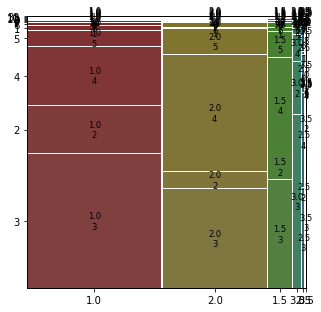

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic

mosaic(house, ['floors','bedrooms'])
plt.show()
# mosaic plot shows us which pair of data is the most popular

## Exercise 4
"I am interested in the house with 3 bedrooms, 2 bathrooms and 2 floors"  
a) Compute the basic statistics of apartments fulfilling above constraints.  
b) Distinct accepted apartments on any of previously created plots.  
c) Find such apartments with best price to footage ratio.  

In [ ]:
temp=house.loc[house['bedrooms']==3]
temp=temp.loc[temp['bathrooms']==2]
temp=temp.loc[temp['floors']==2]
temp.describe()
# We can see statistic for conditions imposed

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.540000e+02,1.540000e+02,154.0,154.0,154.000000,154.000000,154.0,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,4.397177e+09,5.144986e+05,3.0,2.0,1850.279221,23678.948052,2.0,0.006494,0.357143,3.435065,7.551948,1717.422078,132.857143,1969.779221,284.863636,98085.577922,47.567376,-122.247091,1802.337662,17545.123377
std,2.849813e+09,2.497661e+05,0.0,0.0,547.585413,83324.024708,0.0,0.080582,0.919495,0.713322,0.832684,527.473851,248.092631,34.654456,700.057328,48.808788,0.143221,0.150507,453.210930,40404.134611
min,7.600057e+06,2.090000e+05,3.0,2.0,1020.000000,700.000000,2.0,0.000000,0.000000,2.000000,6.000000,720.000000,0.000000,1900.000000,0.000000,98001.000000,47.194700,-122.519000,850.000000,886.000000
25%,2.060901e+09,3.769750e+05,3.0,2.0,1452.500000,3414.750000,2.0,0.000000,0.000000,3.000000,7.000000,1402.500000,0.000000,1942.250000,0.000000,98038.500000,47.498800,-122.361750,1452.500000,4020.000000
50%,3.630010e+09,4.640000e+05,3.0,2.0,1700.000000,5868.500000,2.0,0.000000,0.000000,3.000000,7.000000,1625.000000,0.000000,1984.500000,0.000000,98103.000000,47.584750,-122.299500,1725.000000,6278.000000
75%,7.184074e+09,5.894625e+05,3.0,2.0,2127.500000,10800.250000,2.0,0.000000,0.000000,4.000000,8.000000,1977.500000,207.500000,1997.500000,0.000000,98122.000000,47.682400,-122.149250,2117.500000,10392.250000
max,9.829200e+09,1.755000e+06,3.0,2.0,3650.000000,843309.000000,2.0,1.000000,4.000000,5.000000,10.000000,3650.000000,1120.000000,2014.000000,2014.000000,98199.000000,47.777000,-121.709000,3170.000000,273992.000000


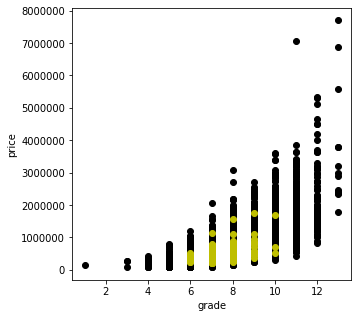

In [ ]:
plt.scatter(house[['grade']].values , house[['price']].values, c = 'k')
plt.scatter(temp[['grade']].values , temp[['price']].values, c = 'y')
plt.ticklabel_format(axis='y', style="plain")
plt.xlabel('grade')
plt.ylabel('price')
plt.show()
# We can see chosen data on The background of the rest

In [ ]:
result = temp['sqft_living']/temp['price']
temp = temp.assign(result = result)
temp.sort_values(by = ['result'],ascending=False).head()
# We can see the best offer in condition imposed sorted by ratio sqft living to price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,result
9704,7452500565,20140829T000000,260000.0,3,2.0,2710,5000,2.0,0,0,3,6,2710,0,1951,0,98126,47.5188,-122.373,850,5000,0.010423
11258,7937600262,20140710T000000,379900.0,3,2.0,3110,44967,2.0,0,0,3,9,3020,90,1999,0,98058,47.4343,-122.082,2150,44967,0.008186
19880,3832050860,20150319T000000,210000.0,3,2.0,1580,4961,2.0,0,0,3,7,1580,0,2006,0,98042,47.3338,-122.053,2280,5000,0.007524
16014,5104450440,20141113T000000,252500.0,3,2.0,1810,10684,2.0,0,0,3,8,1810,0,1987,0,98058,47.4619,-122.153,2140,9657,0.007168
20906,3355400242,20141028T000000,274900.0,3,2.0,1936,6612,2.0,0,0,3,7,1936,0,2014,0,98001,47.2602,-122.246,1620,21600,0.007043
